# 1、连续性
在 tensor 内部存储结构这篇，我们已经介绍了tensor 的数据存储结构，其中说到：Tensor多维数组 数据存储在存储区，底层实现是使用一块连续内存的 1维数数组 进行存储，而该多维数组的形状则保存在了 Tensor 的metadata 中， 例如 ： 

t = torch.arange(12).reshape(3,4)

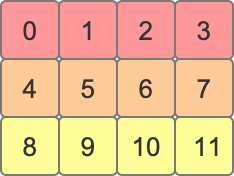

实际上，我们上面生成的数组 t ，它在存储区中是以一维数组形式存储的，如下图 ：


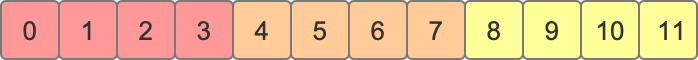

“连续性” 是指： Tensor底层一维数组元素的存储顺序 与Tensor按行优先一维展开的元素顺序是否一致。

我们可以通过 flatten() 方法查看 t 的一维展开形式，通过 storage()  方法查看数据存储区的元素

若 t 一维展开的元素顺序和 数据存储区的元素顺序一致，就说明： t 是连续的

In [ ]:
import torch

t = torch.arange(12).reshape(3,4)

print(t.flatten())
print(t.storage())

# 2、不连续

In [ ]:
# 举例
import torch

t = torch.arange(12).reshape(3,4)
print(t)

t2 = t.transpose(0, 1)  # 对 t 进行转置
print(t2)

print(t2.flatten())
print(t2.storage())

t2 和 t 共享同一个物理内存，即共用同一个源数据，源数据实际存储形式如下：

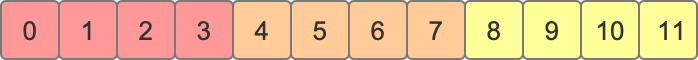

所以，t2 实际存储形式 ([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]) 与 一维展开形式( [0, 4, 8, 1, 5, 9, 2, 6, 10, 3, 7, 11]) 不一致，故， t2 不是连续的。

当 tensor 在内存中不是连续存储时，可能会导致梯度计算错误，进而影响模型的训练和收敛性能。

# 3、is_contiguous() 方法、contiguous()方法
首先，你可通过 is_contiguous() 来判断 Tensor 是否连续

In [ ]:
import torch

t = torch.arange(12).reshape(3,4)
t2 = t.transpose(0, 1)
print(t2.is_contiguous())  # False

其次，你可以在不知道 Tensor 是否连续的情况下，直接使用 contiguous()方法，使其变得连续，但在不同的情况下， contiguous() 的操作是不一样的：

如果Tensor 不是连续的，则会重新开辟一块内存空间保证数据是在内存中是连续的

如果Tensor 是连续的，则 contiguous() 无操作

In [ ]:
import torch

t = torch.arange(12).reshape(3, 4)
t2 = t.transpose(0, 1)
print(t2)

t3 = t2.contiguous()
print(t3)

print(t3.data_ptr() == t2.data_ptr())

对 t2 使用 contiguous() 方法，生成 t3，t3 和 t2 是完全不同的tensor （不是使用同一个存储区的源数据）

# 4、view 与 reshape 对 tensor 连续性的要求
（1）view

在使用 view前，要保证 tensor 的连续性，否则会报错

In [ ]:
import torch

t = torch.arange(12).reshape(3, 4)
t2 = t.transpose(0, 1)
print(t2)

t3 = t2.view(2, 6)
print(t3)

所以，如果 tensor 不连续，我们要先通过 contiguous() 方法，将数据转换为连续的tensor，再使用 view

In [ ]:
import torch

t = torch.arange(12).reshape(3, 4)
t2 = t.transpose(0, 1)
print(t2)

t3 = t2.contiguous()
t3 = t3.view(2, 6)
print(t3)

（2）reshape

为了解决用户使用便捷性问题，PyTorch 在0.4版本以后提供了reshape方法，实现了类似于 tensor.contigous().view(*args) 的功能，如果不关心底层数据是否使用了新的内存，则使用 reshape方法 更方便。

In [ ]:
import torch

t = torch.arange(12).reshape(3, 4)
t2 = t.transpose(0, 1)
print(t2)

t3 = t2.reshape(2, 6)
print(t3)